# Signal analysis
In this notebook, we will create a discrete signal similar to those found in [Banks et. al](https://doi.org/10.1109/AERO.2004.1368169).

However, we start by looking at how to analyze signals. We start by generating a simple signal consisting of two sinusoidal frequencies, with different amplitudes and phases

In [499]:
import numpy as np
T = 3 # Runtime of simulation (s)
sampling_rate = 12 # Hz (1/s)
ts = np.linspace(0, T, int(T*sampling_rate), endpoint=False) # Sample points

In [500]:
def single_signal(A, f, phase, t):
    return A * np.cos(2*np.pi*f*t + phase)

amplitudes = np.array([0.78,0.33], dtype=np.float64)
frequencies = np.array([3., 7.], dtype=np.float64)
phases = np.array([63/180*np.pi, 45/180*np.pi], dtype=np.float64)
signal = sum([single_signal(A, f, phase, ts) for (A, f, phase) in zip(amplitudes,frequencies, phases)])


We start by computing

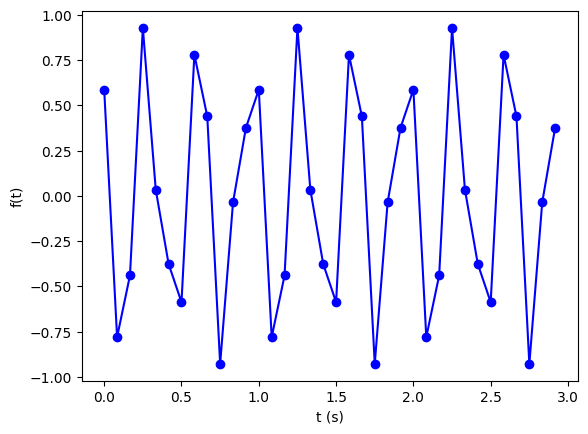

In [501]:
import matplotlib.pyplot as plt
plt.plot(ts, signal, "-bo")
plt.xlabel("t (s)")
plt.ylabel("f(t)")
plt.show()

# Discrete Fourier transform
The discrete Fourier transform (DFT) takes in a signal from the time-domain and transform it into the frequency domain.
Given samples $(t_n, f_n), n=0,\dots,N-1$, we can write the signal as

$$
\begin{align}
    \tilde f_k =\sum_{n=0}^{N-1}f_n\cdot e^{-i2\pi k n/N}
\end{align}
$$
where the amplitude of the signal is equal to  $\frac{\vert\tilde f_k\vert}{N}$, and the phase
$\mathrm{atan2}(\mathrm{Im}(\tilde f_k), \mathrm{Re}(\tilde f_k))$
which means that we can recover a signal from the DFT by computing the inverse transform
$$
\begin{align}
    f_k = \frac{1}{N}\sum_
    {j=0}^{N-1} \tilde f_j e^{i 2\pi j k/N}
\end{align}
$$
We can compute the DFT as a matrix-vector product (with $\mathcal{O}(N^2)$ operations)

In [502]:
def DFT(f: np.ndarray)->np.ndarray:
    """
    Compute the discrete Fourier transform of input signal f
    """
    N = len(f)
    n = np.arange(N, dtype=np.float64)
    k = n.reshape(N, 1)
    exponential = np.exp(-2j*np.pi*k*n/N)
    return np.dot(exponential, f)

def iDFT(frequencies: np.ndarray) ->np.ndarray:
    """
    Compute the inverse Discrete Fourier transform
    """
    N = len(frequencies)
    n = np.arange(N, dtype=np.float64)
    k = n.reshape(N, 1)
    exponential = np.exp(2j*np.pi*k*n/N)
    return 1./N*np.dot(exponential, frequencies)

We compute the DFT of our signal and get the following amplitude plot

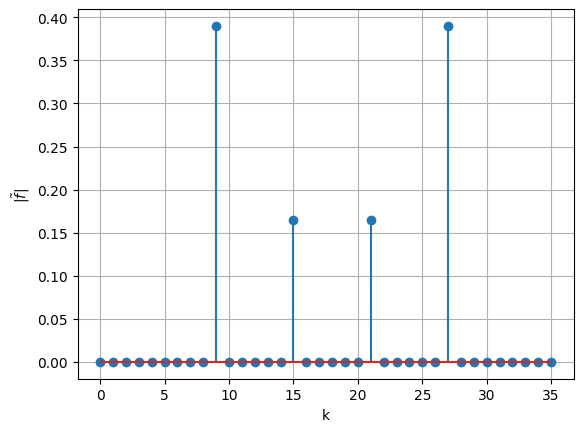

In [503]:
frequencies = DFT(signal)
amplitudes = np.abs(frequencies)/len(signal)
plt.figure()
plt.stem(np.arange(len(frequencies)), amplitudes, label="Amplitude")
plt.xlabel("k")
plt.ylabel(r"$\vert \tilde f \vert$")
plt.grid()
plt.show()

We observe four frequencies corresponding to the frequency $2\pi f/N$, the positive and negative values of $\sin(\omega t)=\frac{1}{2j}(e^{i\omega t}-e^{-i\omega t})$

In [504]:
tol = 1e-6
positions = np.flatnonzero(amplitudes>tol)
print(positions, positions/T, amplitudes[positions])
print(np.angle(frequencies[positions])*180/np.pi)

[ 9 15 21 27] [3. 5. 7. 9.] [0.39  0.165 0.165 0.39 ]
[ 63. -45.  45. -63.]


We also compute the phase shifts

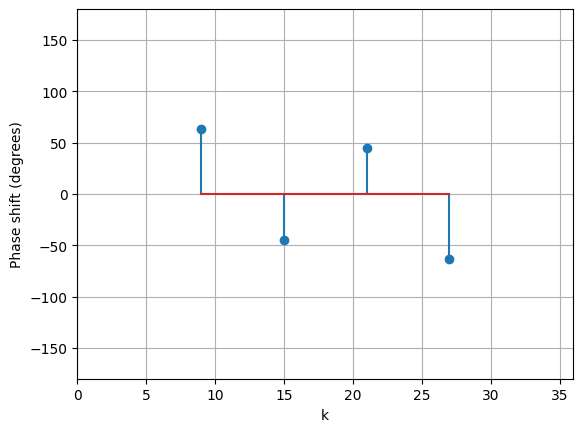

In [512]:
phases = np.angle(frequencies[positions])
plt.stem(positions, phases*180/np.pi)
plt.axis([0,len(ts), -180, 180])
plt.ylabel("Phase shift (degrees)")
plt.xlabel("k")
plt.grid()
plt.show()

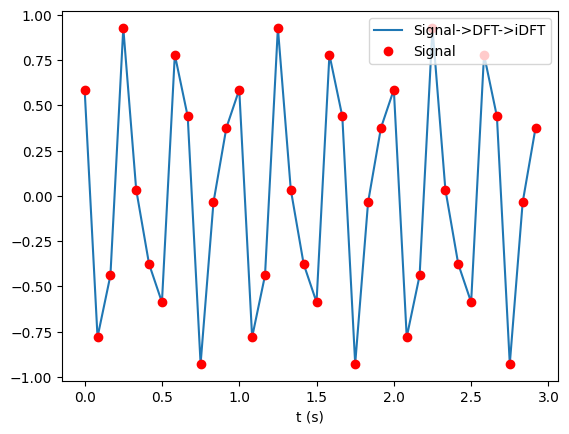

In [508]:
recovered_signal = iDFT(frequencies)
plt.plot(ts, np.real(recovered_signal), label="Signal->DFT->iDFT")
plt.plot(ts, signal, "ro", label="Signal")
plt.xlabel("t (s)")
plt.legend()
plt.show()

## Noisy data
Let us consider a

In [478]:
#We start by generating a discrete signal with a sampling rate of $102.4\cdot10^4$ Hz.
sample_range = np.array([0, 51.2e4])

#102.4e4 # Hz (1/s)